In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#Load dataset
df = pd.read_csv('/content/loan_approval_prediction_train.csv')

In [3]:
print(df["Loan_Status"].value_counts())

Loan_Status
Approved        6460
Not Approved    3540
Name: count, dtype: int64


In [4]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Status
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9,0,621908,1058970,0.0,0.0,Approved
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11,0,679573,904442,0.0,0.0,Approved
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0,Approved
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0,Approved
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0,Approved


**Data Preprocessing**

In [5]:
#Drop unnecessary columns
df.drop(["Loan ID", "Customer ID"], axis=1, inplace=True)

In [6]:
#seperate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [7]:
#Handling missing values in numerical columns
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [8]:
#Handling missing values in categorical columns
cat_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [9]:
#Removing dummy columns
df = pd.get_dummies(df, drop_first=True)

In [10]:
#Define loan Status based on following two conditions
df["Loan_Status"] = np.where(
    (df["Credit Score"] >= 700) & (df["Annual Income"] >= 50000), 1, 0
)

In [11]:
print(df["Loan_Status"].value_counts())

Loan_Status
1    8441
0    1559
Name: count, dtype: int64


In [12]:
#Seperating features and target
x = df.drop(columns='Loan_Status',axis = 1)

In [13]:
y = df['Loan_Status']

In [14]:
x

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan_Status_Not Approved
0,611314.0,747.0,2074116.0,42000.83,21.8,32.0,9.0,0.0,621908.0,1058970.0,...,False,False,False,False,False,False,False,False,False,False
1,266662.0,734.0,1919190.0,36624.40,19.4,32.0,11.0,0.0,679573.0,904442.0,...,False,False,False,False,False,False,False,False,False,False
2,153494.0,709.0,871112.0,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,...,False,False,False,False,False,False,False,False,False,False
3,176242.0,727.0,780083.0,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,...,False,False,False,False,False,False,False,False,False,False
4,321992.0,744.0,1761148.0,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,157806.0,731.0,1514376.0,4795.41,12.5,32.0,9.0,0.0,87058.0,234410.0,...,False,False,False,False,False,False,False,False,False,False
9996,132550.0,718.0,763192.0,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,...,False,False,False,False,False,False,False,False,False,False
9997,223212.0,725.0,1168272.0,4354.42,27.2,32.0,8.0,1.0,99636.0,568370.0,...,False,False,False,False,False,False,False,False,False,False
9998,99999999.0,721.0,972097.0,12232.20,16.8,24.0,8.0,1.0,184984.0,240658.0,...,False,False,False,False,False,False,False,False,False,True


In [15]:
y

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
9995,1
9996,1
9997,1
9998,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

In [18]:
#Scaling by using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**MODEL IMPLEMENTATION AND COMPARISON WITH MODEL EVALUATION**

Model-1:- Support vector Machine(SVM)

In [19]:
from sklearn.svm import SVC

In [20]:
#Training model
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)

SVC()

In [21]:
#Predicting y_test values by using x_test values
y_pred1 = svm.predict(x_test)

In [22]:
#Calculating Confusion Matrix and Accuracy of the model
conf_mat = confusion_matrix(y_pred1,y_test)
acc_sc = accuracy_score(y_pred1,y_test)

In [23]:
#Printing Confusion Matrix and Accuracy of the model
print(conf_mat)
print(acc_sc)

[[   4    0]
 [ 451 2545]]
0.8496666666666667


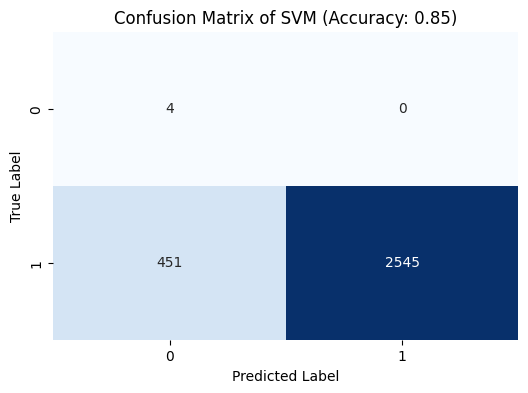

In [24]:
#Plotting the Confusion Matrix of SVM
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix of SVM (Accuracy: {acc_sc:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
# Final Report of SVM model
print('Classification report of SVC : \n ', classification_report(y_test,y_pred1))

Classification report of SVC : 
                precision    recall  f1-score   support

           0       1.00      0.01      0.02       455
           1       0.85      1.00      0.92      2545

    accuracy                           0.85      3000
   macro avg       0.92      0.50      0.47      3000
weighted avg       0.87      0.85      0.78      3000



Model-2:- Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
#Training Model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#Predicting y_test values by using x_test values
y_pred2 = log_reg.predict(x_test)

In [29]:
#Calculating Confusion Matrix and Accuracy of the model
conf_mat1 = confusion_matrix(y_pred2,y_test)
acc_sc1 = accuracy_score(y_pred2,y_test)

In [30]:
#Printing Confusion Matrix and Accuracy of the model
print(conf_mat1)
print(acc_sc1)

[[ 438    2]
 [  17 2543]]
0.9936666666666667


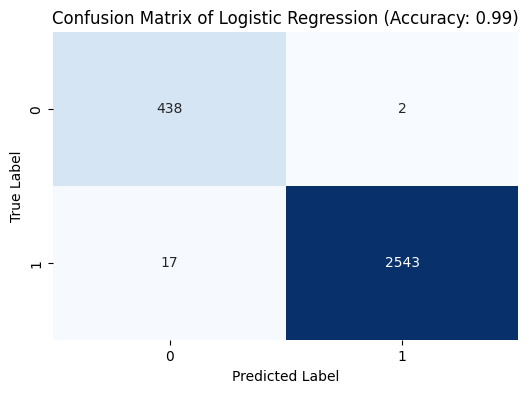

In [31]:
#Plotting the Confusion Matrix of Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix of Logistic Regression (Accuracy: {acc_sc1:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
#Final Report
print('Classification report of Logistic Regression : \n ', classification_report(y_test,y_pred2))

Classification report of Logistic Regression : 
                precision    recall  f1-score   support

           0       1.00      0.96      0.98       455
           1       0.99      1.00      1.00      2545

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



Model-3:- KNeighborsClassifier(KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#Training Model
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
#Predicting y_test values by using x_test values
y_pred3 = knc.predict(x_test)

In [36]:
#Calculating Confusion Matrix and Accuracy of the model
conf_mat2 = confusion_matrix(y_pred3,y_test)
acc_sc2 = accuracy_score(y_pred3,y_test)

In [37]:
#Printing Confusion Matrix and Accuracy of the model
print(conf_mat2)
print(acc_sc2)

[[ 267   15]
 [ 188 2530]]
0.9323333333333333


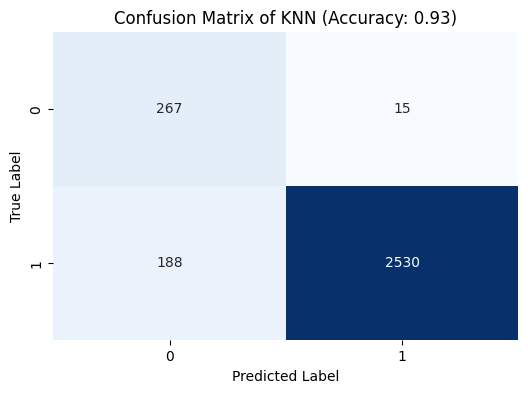

In [38]:
#Plotting the Confusion Matrix of KNN
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix of KNN (Accuracy: {acc_sc2:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
#Final Report
print('Classification report of KNN : \n ', classification_report(y_test,y_pred3))

Classification report of KNN : 
                precision    recall  f1-score   support

           0       0.95      0.59      0.72       455
           1       0.93      0.99      0.96      2545

    accuracy                           0.93      3000
   macro avg       0.94      0.79      0.84      3000
weighted avg       0.93      0.93      0.93      3000

